In [1]:
# Load data, "continuous_factory_process.csv"

import pandas as pd
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/ML Project/continuous_factory_process.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# select features and targets
X = df.iloc[:, 1:41]  # Features from start to Combiner stage

# Calculate error based on interleaved columns
num_measurements = len(df.columns[42:71]) // 2  # Number of measurements
actual_cols = df.columns[42:72:2]  # Actual columns (every other column starting from 42)
setpoint_cols = df.columns[43:72:2]  # Setpoint columns (every other column starting from 43)


#new error dataframe
error_df = df[actual_cols].values - df[setpoint_cols].values
y = pd.DataFrame(error_df, columns=[col.replace(".C.Actual", ".Error") for col in actual_cols])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=122)


In [3]:
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [4]:
# tuned random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200,
                              min_samples_split=10,
                              min_samples_leaf=2,
                              max_features='sqrt',
                              max_depth=None,
                              bootstrap=False,
                              random_state=122)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200, random_state=122)

In [7]:
# Evaluate the model
y_pred = model.predict(X_test)

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2.9182226182610047
Root Mean Squared Error (RMSE): 1.7082806029048638
R-squared (R2): 0.6337142688688482


In [13]:
print(X.shape)

(14088, 40)


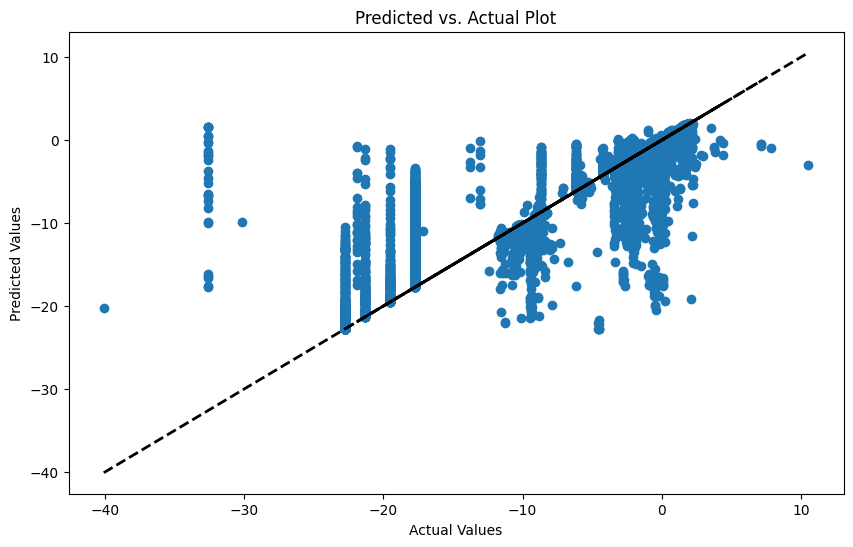

In [35]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)  # 'y_test' are actual values, 'y_pred' are predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Plot")
plt.show()

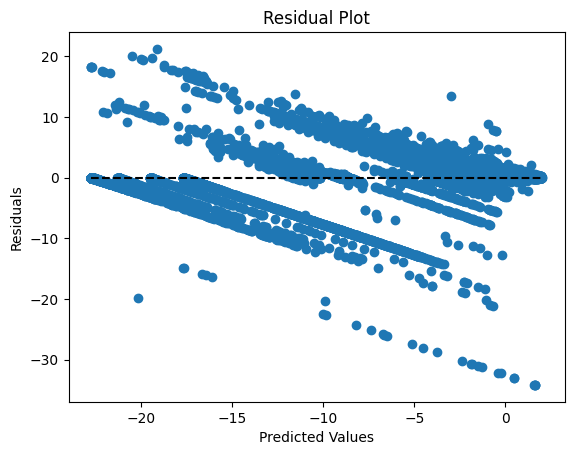

In [36]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', linestyles='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

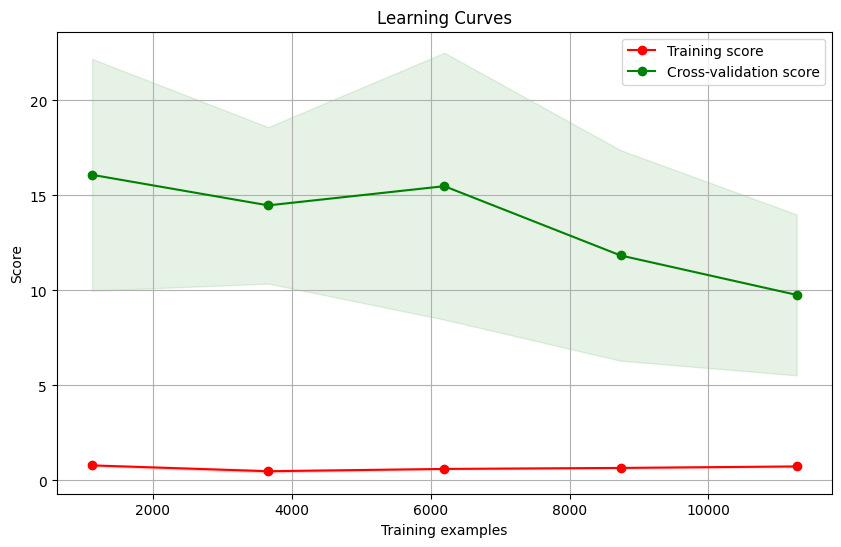

In [38]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error'
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)

plt.legend(loc="best")
plt.show()

In [17]:
# Calculate standard deviations for each target variable
target_stds = y.std()

# Print the standard deviations
print(target_stds)

average_std = target_stds.mean()
print(f"Average Standard Deviation: {average_std}")


Stage1.Output.Measurement0.U.Actual     0.459863
Stage1.Output.Measurement1.U.Actual     6.947075
Stage1.Output.Measurement2.U.Actual     0.777129
Stage1.Output.Measurement3.U.Actual     1.624725
Stage1.Output.Measurement4.U.Actual     3.265375
Stage1.Output.Measurement5.U.Actual     0.593412
Stage1.Output.Measurement6.U.Actual     1.147180
Stage1.Output.Measurement7.U.Actual     1.417144
Stage1.Output.Measurement8.U.Actual     4.621934
Stage1.Output.Measurement9.U.Actual     4.041998
Stage1.Output.Measurement10.U.Actual    0.972748
Stage1.Output.Measurement11.U.Actual    2.557862
Stage1.Output.Measurement12.U.Actual    0.661291
Stage1.Output.Measurement13.U.Actual    0.923409
Stage1.Output.Measurement14.U.Actual    7.405938
dtype: float64
Average Standard Deviation: 2.494472162798506


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# now using only the top 10 features

# Get feature importances from the original model
feature_importances = model.feature_importances_

# Get indices of top 10 features
top_10_feature_indices = np.argsort(feature_importances)[-10:]

# Select top 10 features from X_train and X_test
X_train_top10 = X_train[:, top_10_feature_indices]
X_test_top10 = X_test[:, top_10_feature_indices]

# Create and train a new model with top 10 features
top10_model = RandomForestRegressor(n_estimators=200,
                                   min_samples_split=10,
                                   min_samples_leaf=2,
                                   max_features='sqrt',
                                   max_depth=None,
                                   bootstrap=False,
                                   random_state=122)

top10_model.fit(X_train_top10, y_train)

# Evaluate the new model
y_pred_top10 = top10_model.predict(X_test_top10)
mse_top10 = mean_squared_error(y_test, y_pred_top10)
rmse_top10 = np.sqrt(mse_top10)
r2_top10 = r2_score(y_test, y_pred_top10)

print(f"Mean Squared Error (MSE) with Top 10 Features: {mse_top10}")
print(f"Root Mean Squared Error (RMSE) with Top 10 Features: {rmse_top10}")
print(f"R-squared (R2) with Top 10 Features: {r2_top10}")

Mean Squared Error (MSE) with Top 10 Features: 3.106892362596248
Root Mean Squared Error (RMSE) with Top 10 Features: 1.7626378988879843
R-squared (R2) with Top 10 Features: 0.6225164959635957


In [25]:
# time test
import time

# ... (Your existing code for loading data, training models, etc.) ...

# Test time for the regular model
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()
regular_model_time = end_time - start_time

# Test time for the top 10 features model
start_time = time.time()
y_pred_top10 = top10_model.predict(X_test_top10)
end_time = time.time()
top10_model_time = end_time - start_time

print(f"Regular Model Test Time: {regular_model_time:.4f} seconds")
print(f"Top 10 Features Model Test Time: {top10_model_time:.4f} seconds")

Regular Model Test Time: 0.4834 seconds
Top 10 Features Model Test Time: 0.2979 seconds


In [31]:
#unsuccessful xgb boost

import xgboost as xgb

# Create an XGBRegressor with similar parameters to your Random Forest
xgb_model = xgb.XGBRegressor(
    n_estimators=200,  # Same as your Random Forest
    learning_rate=1,
    max_depth=None,     # Same as your Random Forest (no max depth restriction)
    # ... other parameters you want to keep similar ...
    objective='reg:squarederror',
    random_state=122
)

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)
# ... (Calculate and print evaluation metrics - MSE, RMSE, R-squared) ...


In [30]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Mean Squared Error (MSE) with XGBoost: {mse_xgb}")
print(f"Root Mean Squared Error (RMSE) with XGBoost: {rmse_xgb}")
print(f"R-squared (R2) with XGBoost: {r2_xgb}")

Mean Squared Error (MSE) with XGBoost: 3.3381433486938477
Root Mean Squared Error (RMSE) with XGBoost: 1.8270586604413794
R-squared (R2) with XGBoost: 0.5510052442550659
